In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                7
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
dataset.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [8]:
dataset.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.0,1,1,1,101348.88,1


In [9]:
dataset_dummies = pd.get_dummies(dataset)

In [10]:
import seaborn as sns

In [11]:
churn = dataset[dataset.Exited == 1]
not_churn = dataset[dataset.Exited == 0]

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dataset.Geography)
churn['Geography']=le.transform(churn.Geography)
not_churn['Geography']=le.transform(not_churn.Geography)

/Users/makhanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/makhanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
le = LabelEncoder()
le.fit(dataset.Gender)
churn['Gender']=le.transform(churn.Gender)
not_churn['Gender']=le.transform(not_churn.Gender)

/Users/makhanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/makhanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

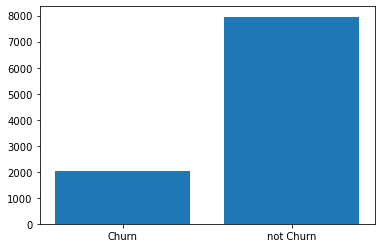

0    7958
1    2035
Name: Exited, dtype: int64

In [15]:
plt.bar(x=['Churn','not Churn'], height=[churn.shape[0], not_churn.shape[0]])
plt.show()
dataset.Exited.value_counts()

In [16]:
from sklearn.utils.class_weight import compute_class_weight

In [17]:
compute_class_weight('balanced', classes=[0,1], y=dataset.Exited.values)

array([0.62785876, 2.45528256])

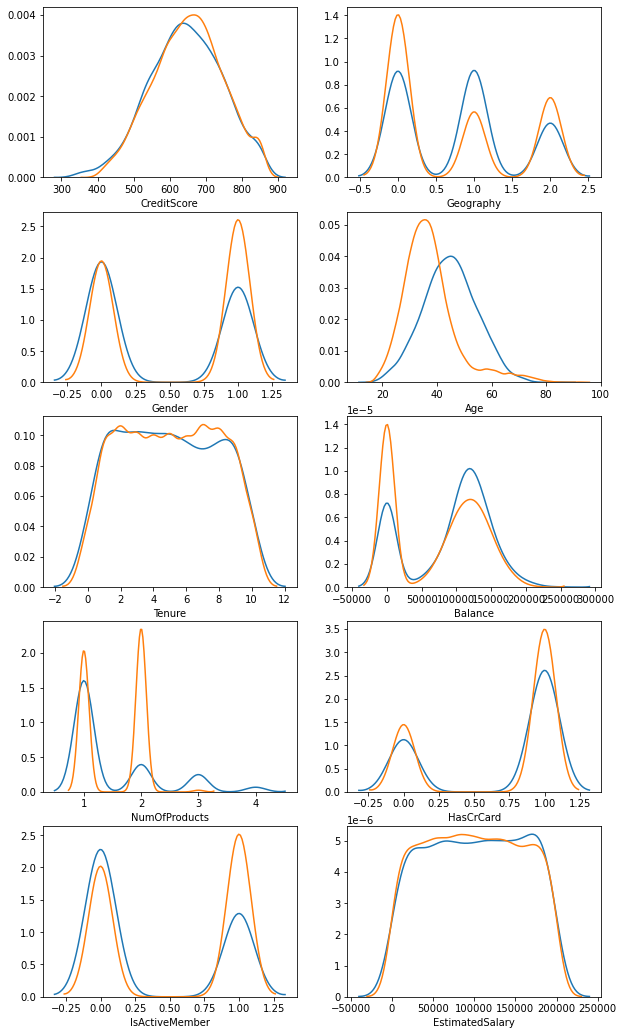

In [18]:
f, axes = plt.subplots(5, 2, figsize=(10, 10), sharex=False)
f.subplots_adjust(top=1.5)
sns.distplot(churn.CreditScore, hist=False, ax=axes[0,0])
sns.distplot(not_churn.CreditScore, hist=False, ax=axes[0,0])

sns.distplot(churn.Geography, hist=False, ax=axes[0,1])
sns.distplot(not_churn.Geography, hist=False, ax=axes[0,1])

sns.distplot(churn.Gender, hist=False, ax=axes[1,0])
sns.distplot(not_churn.Gender, hist=False, ax=axes[1,0])

sns.distplot(churn.Age, hist=False, ax=axes[1,1])
sns.distplot(not_churn.Age, hist=False, ax=axes[1,1])

sns.distplot(churn.Tenure, hist=False, ax=axes[2,0])
sns.distplot(not_churn.Tenure, hist=False, ax=axes[2,0])

sns.distplot(churn.Balance, hist=False, ax=axes[2,1])
sns.distplot(not_churn.Balance, hist=False, ax=axes[2,1])

sns.distplot(churn.NumOfProducts, hist=False, ax=axes[3,0])
sns.distplot(not_churn.NumOfProducts, hist=False, ax=axes[3,0])

sns.distplot(churn.HasCrCard, hist=False, ax=axes[3,1])
sns.distplot(not_churn.HasCrCard, hist=False, ax=axes[3,1])

sns.distplot(churn.IsActiveMember, hist=False, ax=axes[4,0])
sns.distplot(not_churn.IsActiveMember, hist=False, ax=axes[4,0])

sns.distplot(churn.EstimatedSalary, hist=False, ax=axes[4,1])
sns.distplot(not_churn.EstimatedSalary, hist=False, ax=axes[4,1])

# sns.distplot(churn.NumOfProducts, hist=False, ax=axes[1,1])
# sns.distplot(not_churn.NumOfProducts, hist=False, ax=axes[1,1])


In [19]:
X = dataset_dummies.drop(['CreditScore','Tenure','HasCrCard', 'EstimatedSalary','Exited', axis=1).values
y = dataset_dummies['Exited'].values

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
st_sc = StandardScaler()

In [22]:
X_scaled = st_sc.fit_transform(X)

In [23]:
dataset_dummies.shape

(9993, 14)

In [24]:
X_scaled.shape

(9993, 13)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2, stratify=y)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logreg = LogisticRegression()

In [29]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_preds = logreg.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, accuracy_score

In [32]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1592
           1       0.60      0.18      0.28       407

    accuracy                           0.81      1999
   macro avg       0.71      0.58      0.59      1999
weighted avg       0.78      0.81      0.77      1999



In [33]:
accuracy_score(y_test, y_preds)

0.8089044522261131

In [34]:
X_train.shape

(7994, 13)

In [35]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

In [36]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape=(13,)))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [38]:
model.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
800/800 [==============================] - 1s 784us/step - loss: 0.4703 - accuracy: 0.7848
Epoch 2/10
800/800 [==============================] - 1s 762us/step - loss: 0.3993 - accuracy: 0.8275
Epoch 3/10
800/800 [==============================] - 1s 771us/step - loss: 0.3711 - accuracy: 0.8456
Epoch 4/10
800/800 [==============================] - 1s 715us/step - loss: 0.3555 - accuracy: 0.8530
Epoch 5/10
800/800 [==============================] - 1s 758us/step - loss: 0.3485 - accuracy: 0.8571
Epoch 6/10
800/800 [==============================] - 1s 741us/step - loss: 0.3441 - accuracy: 0.8578
Epoch 7/10
800/800 [==============================] - 1s 756us/step - loss: 0.3413 - accuracy: 0.8601
Epoch 8/10
800/800 [==============================] - 1s 638us/step - loss: 0.3404 - accuracy: 0.8593
Epoch 9/10
800/800 [==============================] - 1s 682us/step - loss: 0.3384 - accuracy: 0.8603
Epoch 10/10
800/800 [==============================] - 1s 828us/step - loss: 0.337

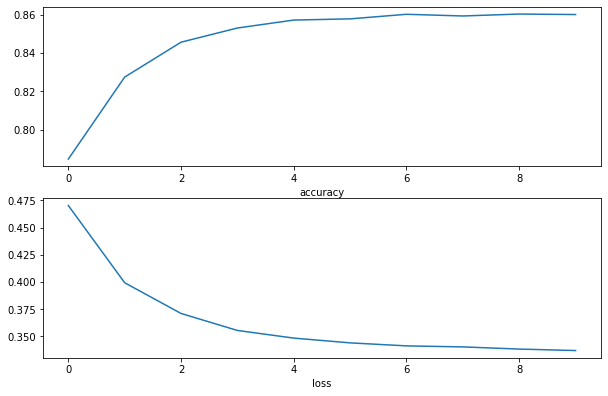

In [39]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,5))
fig.subplots_adjust(top=1.1)

ax1.plot(model.history.epoch,model.history.history['accuracy'])
#ax1.set_title('accuracy')
ax1.set_xlabel('accuracy')

ax2.plot(model.history.epoch,model.history.history['loss'])
#ax1.set_title('loss')
ax2.set_xlabel('loss')
plt.show()

In [40]:
y_preds = model.predict(X_test)

In [41]:
y_preds = (y_preds>0.5)

In [42]:
y_preds

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [43]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1592
           1       0.72      0.46      0.57       407

    accuracy                           0.85      1999
   macro avg       0.80      0.71      0.74      1999
weighted avg       0.84      0.85      0.84      1999



In [44]:
accuracy_score(y_test, y_preds)

0.8549274637318659

In [45]:
model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape=(13,)))
#model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [47]:
#model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
model.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
800/800 [==============================] - 1s 772us/step - loss: 0.4793 - accuracy: 0.7945
Epoch 2/10
800/800 [==============================] - 1s 741us/step - loss: 0.4072 - accuracy: 0.8294
Epoch 3/10
800/800 [==============================] - 1s 766us/step - loss: 0.3764 - accuracy: 0.8421
Epoch 4/10
800/800 [==============================] - 1s 741us/step - loss: 0.3568 - accuracy: 0.8519
Epoch 5/10
800/800 [==============================] - 1s 760us/step - loss: 0.3472 - accuracy: 0.8553
Epoch 6/10
800/800 [==============================] - 1s 683us/step - loss: 0.3428 - accuracy: 0.8580
Epoch 7/10
800/800 [==============================] - 1s 696us/step - loss: 0.3398 - accuracy: 0.8583
Epoch 8/10
800/800 [==============================] - 1s 802us/step - loss: 0.3363 - accuracy: 0.8593
Epoch 9/10
800/800 [==============================] - 1s 869us/step - loss: 0.3349 - accuracy: 0.8614
Epoch 10/10
800/800 [==============================] - 1s 905us/step - loss: 0.333

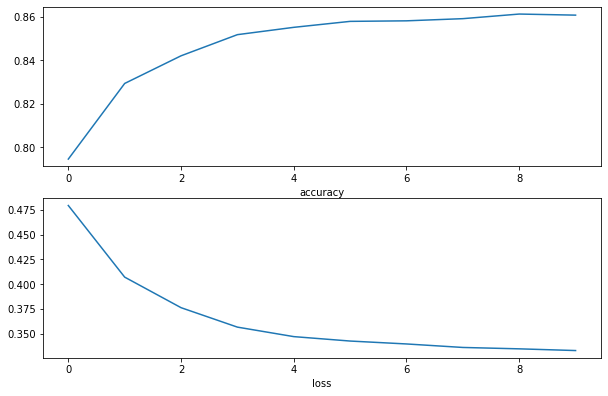

In [48]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,5))
fig.subplots_adjust(top=1.1)

ax1.plot(model.history.epoch,model.history.history['accuracy'])
#ax1.set_title('accuracy')
ax1.set_xlabel('accuracy')

ax2.plot(model.history.epoch,model.history.history['loss'])
#ax1.set_title('loss')
ax2.set_xlabel('loss')
plt.show()

In [49]:
y_preds = model.predict(X_test)

In [50]:
y_preds = (y_preds>0.5)

In [51]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1592
           1       0.75      0.42      0.54       407

    accuracy                           0.85      1999
   macro avg       0.81      0.69      0.73      1999
weighted avg       0.84      0.85      0.84      1999



In [52]:
accuracy_score(y_test, y_preds)

0.8534267133566783

In [53]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape=(13,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
#model.compile(optimizer='adam', metrics=['AUC'], loss='binary_crossentropy')
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [55]:
model.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
800/800 [==============================] - 1s 971us/step - loss: 0.4671 - accuracy: 0.7980
Epoch 2/10
800/800 [==============================] - 1s 962us/step - loss: 0.4073 - accuracy: 0.8311
Epoch 3/10
800/800 [==============================] - 1s 852us/step - loss: 0.3840 - accuracy: 0.8426
Epoch 4/10
800/800 [==============================] - 1s 977us/step - loss: 0.3650 - accuracy: 0.8466
Epoch 5/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3639 - accuracy: 0.8528
Epoch 6/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3621 - accuracy: 0.8524
Epoch 7/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3576 - accuracy: 0.8526
Epoch 8/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3511 - accuracy: 0.8566
Epoch 9/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3480 - accuracy: 0.8584
Epoch 10/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3482 - accuracy

In [56]:
y_preds = model.predict(X_test)

In [57]:
y_preds = (y_preds>0.5)

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1592
           1       0.78      0.43      0.55       407

    accuracy                           0.86      1999
   macro avg       0.83      0.70      0.74      1999
weighted avg       0.85      0.86      0.84      1999



In [59]:
accuracy_score(y_test, y_preds)

0.8594297148574287

# Downsampling

In [93]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [94]:
oversampling = SMOTE()
undersampling = TomekLinks()
over_under = SMOTETomek()

In [174]:
# X_original = dataset_dummies.drop('Exited', axis=1)
# y_original = dataset_dummies['Exited']
X_original = dataset_dummies.drop(['CreditScore','Tenure','HasCrCard', 'EstimatedSalary','Exited'], axis=1).values
y_original = dataset_dummies['Exited'].values

In [148]:
len(y==1)

13830

In [189]:
#over_under
X, y = over_under.fit_resample(X_original, y_original)

In [ ]:
#
X, y = over_under.fit_resample(X_original, y_original)

In [ ]:
X, y = over_under.fit_resample(X_original, y_original)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, stratify=y)

In [177]:
X_train_scaled = st_sc.fit_transform(X_train)
X_test_scaled = st_sc.fit_transform(X_test)

In [180]:
model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape=(9,)))
#model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [181]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
model.fit(X_train_scaled, y_train, batch_size=10, epochs=20)

Epoch 1/20
1133/1133 [==============================] - 1s 849us/step - loss: 0.5355 - accuracy: 0.7355
Epoch 2/20
1133/1133 [==============================] - 1s 852us/step - loss: 0.4445 - accuracy: 0.7956
Epoch 3/20
1133/1133 [==============================] - 1s 859us/step - loss: 0.4165 - accuracy: 0.8120
Epoch 4/20
1133/1133 [==============================] - 1s 863us/step - loss: 0.3997 - accuracy: 0.8188
Epoch 5/20
1133/1133 [==============================] - 1s 842us/step - loss: 0.3875 - accuracy: 0.8258
Epoch 6/20
1133/1133 [==============================] - 1s 835us/step - loss: 0.3784 - accuracy: 0.8296
Epoch 7/20
1133/1133 [==============================] - 1s 827us/step - loss: 0.3702 - accuracy: 0.8340
Epoch 8/20
1133/1133 [==============================] - 1s 842us/step - loss: 0.3650 - accuracy: 0.8381
Epoch 9/20
1133/1133 [==============================] - 1s 830us/step - loss: 0.3618 - accuracy: 0.8400
Epoch 10/20
1133/1133 [==============================] - 1s 837u

In [182]:
y_preds = model.predict(X_test_scaled)

In [183]:
y_preds = (y_preds>0.5)

In [92]:
#oversampling
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1592
           1       0.84      0.83      0.84      1592

    accuracy                           0.84      3184
   macro avg       0.84      0.84      0.84      3184
weighted avg       0.84      0.84      0.84      3184



In [84]:
#undersampling
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1592
           1       0.81      0.82      0.82      1368

    accuracy                           0.83      2960
   macro avg       0.83      0.83      0.83      2960
weighted avg       0.83      0.83      0.83      2960



In [102]:
#over_under
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1542
           1       0.88      0.81      0.84      1541

    accuracy                           0.85      3083
   macro avg       0.85      0.85      0.85      3083
weighted avg       0.85      0.85      0.85      3083



In [138]:
#over_under_20_epochs
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1383
           1       0.87      0.84      0.86      1383

    accuracy                           0.86      2766
   macro avg       0.86      0.86      0.86      2766
weighted avg       0.86      0.86      0.86      2766



In [126]:
#over_under_30_epochs
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1538
           1       0.91      0.84      0.87      1537

    accuracy                           0.88      3075
   macro avg       0.88      0.88      0.88      3075
weighted avg       0.88      0.88      0.88      3075



In [184]:
#over_under_deleted_features_20_epochs
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1416
           1       0.84      0.85      0.84      1415

    accuracy                           0.84      2831
   macro avg       0.84      0.84      0.84      2831
weighted avg       0.84      0.84      0.84      2831



# Logistic Regression

In [185]:
logit = LogisticRegression()

In [191]:
logit.fit(X_train, y_train)

LogisticRegression()

In [192]:
logit_pred = logit.predict(X_test)

In [193]:
print(classification_report(y_test, logit_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1414
           1       0.50      1.00      0.67      1414

    accuracy                           0.50      2828
   macro avg       0.25      0.50      0.33      2828
weighted avg       0.25      0.50      0.33      2828



/Users/makhanov/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1414
           1       0.90      0.87      0.88      1414

    accuracy                           0.89      2828
   macro avg       0.89      0.89      0.89      2828
weighted avg       0.89      0.89      0.89      2828



In [196]:
import xgboost as xgb

In [197]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1414
           1       0.94      0.88      0.91      1414

    accuracy                           0.91      2828
   macro avg       0.91      0.91      0.91      2828
weighted avg       0.91      0.91      0.91      2828



In [198]:
xgb_model.feature_importances_

array([0.09128916, 0.02354122, 0.25611272, 0.31209123, 0.04239687,
       0.13168049, 0.04130678, 0.10158154, 0.        ], dtype=float32)

In [204]:

dataset_dummies.drop(['CreditScore','Tenure','HasCrCard', 'EstimatedSalary','Exited'], axis=1).columns


Index(['Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [205]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

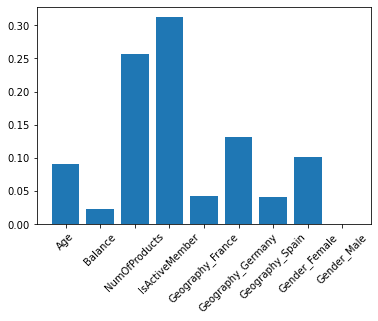

In [207]:
plt.bar(dataset_dummies.drop(['CreditScore','Tenure','HasCrCard', 'EstimatedSalary','Exited'], axis=1).columns,
        xgb_model.feature_importances_)
plt.xticks(rotation=45)

In [167]:
#over_under
data_resampled = pd.concat([X, y], axis=1)
data_resampled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42.0,2,0.00,1,1,1,101348.88,1,0,0,1,0,1
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0,1,1,0,0
2,502,42.0,8,159660.80,3,1,0,113931.57,1,0,0,1,0,1
3,850,43.0,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0
4,645,44.0,8,113755.78,2,1,0,149756.71,0,0,1,0,1,1


In [168]:
churn = data_resampled[data_resampled.Exited == 1]
not_churn = data_resampled[data_resampled.Exited == 0]

/Users/makhanov/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/makhanov/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/makhanov/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/makhanov/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/makhanov/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


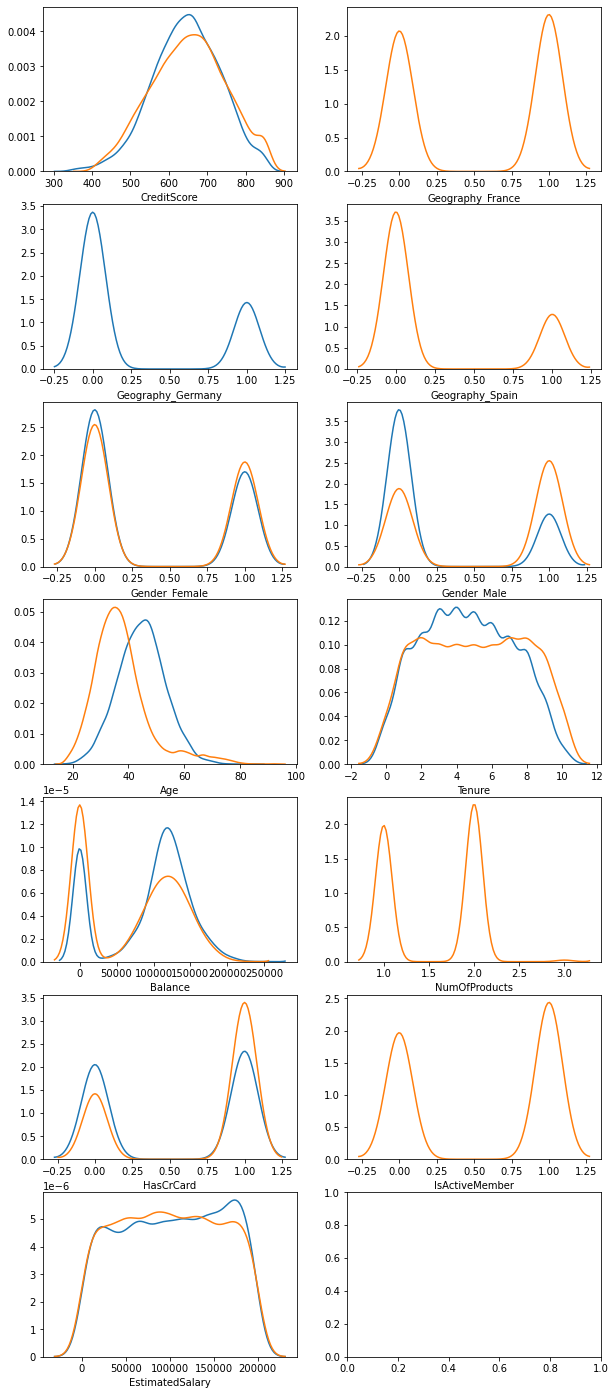

In [209]:
f, axes = plt.subplots(7, 2, figsize=(10, 10), sharex=False)
f.subplots_adjust(top=2)
sns.distplot(churn.CreditScore, hist=False, ax=axes[0,0])
sns.distplot(not_churn.CreditScore, hist=False, ax=axes[0,0])

sns.distplot(churn.Geography_France, hist=False, ax=axes[0,1])
sns.distplot(not_churn.Geography_France, hist=False, ax=axes[0,1])

sns.distplot(churn.Geography_Germany, hist=False, ax=axes[1,0])
sns.distplot(not_churn.Geography_Germany, hist=False, ax=axes[1,0])

sns.distplot(churn.Geography_Spain, hist=False, ax=axes[1,1])
sns.distplot(not_churn.Geography_Spain, hist=False, ax=axes[1,1])

sns.distplot(churn.Gender_Female, hist=False, ax=axes[2,0])
sns.distplot(not_churn.Gender_Female, hist=False, ax=axes[2,0])

sns.distplot(churn.Gender_Male, hist=False, ax=axes[2,1])
sns.distplot(not_churn.Gender_Male, hist=False, ax=axes[2,1])

sns.distplot(churn.Age, hist=False, ax=axes[3,0])
sns.distplot(not_churn.Age, hist=False, ax=axes[3,0])

sns.distplot(churn.Tenure, hist=False, ax=axes[3,1])
sns.distplot(not_churn.Tenure, hist=False, ax=axes[3,1])

sns.distplot(churn.Balance, hist=False, ax=axes[4,0])
sns.distplot(not_churn.Balance, hist=False, ax=axes[4,0])

sns.distplot(churn.NumOfProducts, hist=False, ax=axes[4,1])
sns.distplot(not_churn.NumOfProducts, hist=False, ax=axes[4,1])

sns.distplot(churn.HasCrCard, hist=False, ax=axes[5,0])
sns.distplot(not_churn.HasCrCard, hist=False, ax=axes[5,0])

sns.distplot(churn.IsActiveMember, hist=False, ax=axes[5,1])
sns.distplot(not_churn.IsActiveMember, hist=False, ax=axes[5,1])

sns.distplot(churn.EstimatedSalary, hist=False, ax=axes[6,0])
sns.distplot(not_churn.EstimatedSalary, hist=False, ax=axes[6,0])

# sns.distplot(churn.NumOfProducts, hist=False, ax=axes[1,1])
# sns.distplot(not_churn.NumOfProducts, hist=False, ax=axes[1,1])


